In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

(1334, 2000, 3)

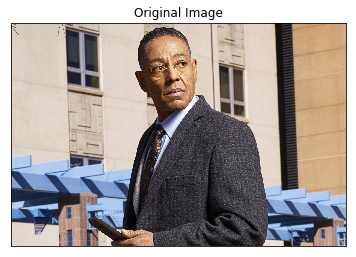

In [4]:
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)
image.shape

Number of faces detected: 1


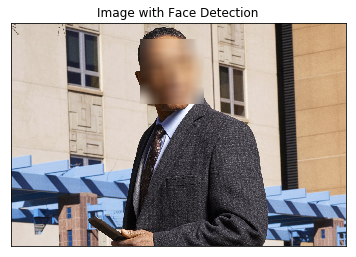

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('xml_files/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')
# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 2,3)
#eyes=eye_cascade.detectMultiScale(gray)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    
    kernel = np.ones((100,100),np.float32)/10000
    image_with_detections[y:y+w,x:x+h,:]= cv2.filter2D(image_with_detections[y:y+w,x:x+h,:],-1,kernel)
#for (x,y,w,h) in eyes:
    # Add a red bounding box to the detections image
    #cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (0,255,0), 3)    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

In [6]:
def laptop_camera_face_blur(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')
# Detect the faces in image
    faces = face_cascade.detectMultiScale(gray, 2,3)
#eyes=eye_cascade.detectMultiScale(gray)

# Print the number of faces detected in the image
#print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
    

# Get the bounding box for each detected face
    for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    
        kernel = np.ones((100,100),np.float32)/10000
        frame[y:y+w,x:x+h,:]= cv2.filter2D(frame[y:y+w,x:x+h,:],-1,kernel)
    return frame 

In [ ]:
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep the video stream open
    while rval:
        # Plot the image from camera with all the face and eye detections marked
        laptop_camera_face_blur(frame)
        cv2.imshow("face detection activated", frame)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [ ]:
laptop_camera_go()